In [1]:
import re
import numpy as np
import pandas as pd
import cv2
import os,sys
import glob
import shutil
import imutils
from matplotlib import pyplot as plt 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Input, MaxPooling2D, Activation, BatchNormalization, Concatenate, Dropout, Add,LeakyReLU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model
import efficientnet.tfkeras as efc
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


In [2]:
#start with vgg16
path_test = '/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Results_Pipelines_Images/Binary_Classifier_data/Objects_split/Test'
####fix test images

test_images = []
test_labels = []
count=0
test_list = glob.glob(path_test+'/*')
for image in test_list:
    #get the labels
    label = image.split('_')[-1].replace('.png','')
    test_labels.append(label)
    #read the image in RGB because vgg16 only takes rgbs
    im = cv2.imread(image)
    im =  cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    test_images.append(im)
    
# #convert lists to arrays.. no need to one-hot encode the test labels in this case
test_labels = np.array(test_labels,dtype=np.int64)
test_images = np.array(test_images) 

x_test,y_test = test_images,test_labels

#change the architecture based on whether its vgg16 or effnet



#predefine image shape
Image_size = (224,224,3)


vgg = VGG16(input_shape = Image_size , weights = 'imagenet', include_top = False)
#vgg.summary()
        
#to prevent training existing weights
for layer in vgg.layers:
        layer.trainable = False

#build the model
x = vgg.input
y = vgg.output # a vector with a size of 2 for each image (2 probabilities)
y = Flatten(name = 'flatten')(y)
#normaliza the input to the neural network to speed up training
y = BatchNormalization()(y)
y = Dense(32, activation='relu', name = 'FC1')(y)
y = Dropout(0.2)(y)
#y = Dense(512, activation='relu', name = 'FC2')(y)
#y = Dropout(0.5)(y)
y = Dense(2, activation = 'softmax', name = 'prediction')(y)
model = Model(inputs = x, outputs = y)
#model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#load the best model's weight (each split separately)
model.load_weights('//home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Notebooks_Master/trainings/trainings/train_augmentation/model9_vgg16_100epochs_modified/round2/model.03-0.83.h5')

#predict on np array-ed images
y_hat_pred_vgg = model.predict(x_test,verbose = 1)



123/123 [==============================] - 7s 54ms/sample


In [4]:
##Get metrics on one of the vgg16 models.. change the model for other folds

# for i in y_pred_train:
#     print(i) #the output is probability vectors e.g.[0.9, 0.1]
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

yhat_test_classes =  np.argmax(y_hat_pred_vgg, axis=1)

# y_test = np.argmax(test_labels, axis =1)



accuracy = accuracy_score(test_labels, yhat_test_classes) 
print('Accuracy: %.3f' % (accuracy*100))



precision = precision_score(test_labels, yhat_test_classes)
print('Precision: %.3f' % (precision*100))



recall = recall_score(test_labels, yhat_test_classes)
print('Recall: %.3f' % (recall*100))



f1 = f1_score(test_labels, yhat_test_classes)
print('f1: %.3f' % (f1*100))


Accuracy: 72.358
Precision: 42.500
Recall: 60.714
f1: 50.000


In [5]:
#effnetb7

path_test = '/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Results_Pipelines_Images/Binary_Classifier_data/Objects_split/Test'
####fix test images

test_images = []
test_labels = []
count=0
test_list = glob.glob(path_test+'/*')
for image in test_list:
    #get the labels
    label = image.split('_')[-1].replace('.png','')
    test_labels.append(label)
    #read the image in RGB because vgg16 only takes rgbs
    im = cv2.imread(image)
    im =  cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    test_images.append(im)
    
# #convert lists to arrays.. no need to one-hot encode the test labels in this case
test_labels = np.array(test_labels,dtype=np.int64)
test_images = np.array(test_images) 

x_test,y_test = test_images,test_labels

#change the architecture based on whether its vgg16 or effnet



#predefine image shape
Image_size = (224,224,3)


efnet = efc.EfficientNetB7(input_shape = Image_size , weights = 'imagenet', include_top = False)



#build the model architecture again. change it according to the model loaded
x = efnet.input
y = efnet.output # a vector with a size of 2 for each image (2 probabilities)
y = Flatten(name = 'flatten')(y)
#normaliza the input to the neural network to speed up training
y = BatchNormalization()(y)
y = Dense(32, name = 'FC1')(y)
y = LeakyReLU()(y)
y = Dropout(0.2)(y)
#y = Dense(512, activation='relu', name = 'FC2')(y)
#y = Dropout(0.5)(y)
y = Dense(2, activation = 'softmax', name = 'prediction')(y)
model = Model(inputs = x, outputs = y)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



#load the best model's weight (each split separately)
model.load_weights('/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Notebooks_Master/trainings/trainings/train_augmentation/model9_effnetB7_modified/round2/model.32-0.99.h5')

#predict on np array-ed images
y_hat_pred_eff = model.predict(x_test,verbose = 1)



123/123 [==============================] - 32s 256ms/sample


In [7]:
# for i in y_pred_train:
#     print(i) #the output is probability vectors e.g.[0.9, 0.1]
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

yhat_test_classes =  np.argmax(y_hat_pred_eff, axis=1)

# y_test = np.argmax(test_labels, axis =1)



accuracy = accuracy_score(test_labels, yhat_test_classes) 
print('Accuracy: %.3f' % (accuracy*100))



precision = precision_score(test_labels, yhat_test_classes)
print('Precision: %.3f' % (precision*100))



recall = recall_score(test_labels, yhat_test_classes)
print('Recall: %.3f' % (recall*100))



f1 = f1_score(test_labels, yhat_test_classes)
print('f1: %.3f' % (f1*100))


Accuracy: 95.935
Precision: 100.000
Recall: 82.143
f1: 90.196


In [6]:
yhat_vgg = np.argmax(y_hat_pred_vgg, axis =1)
yhat_eff =  np.argmax(y_hat_pred_eff, axis=1)

print(yhat_vgg)
print(yhat_eff)
print(y_test)



[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 1 1 0 0 1]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0]


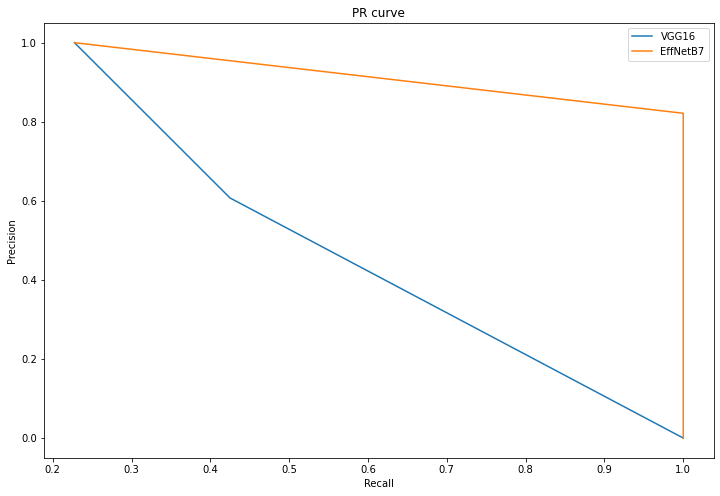

In [8]:
#PR curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve,roc_auc_score,precision_recall_curve


precision1, recall1, threshold1 = precision_recall_curve(y_test, yhat_vgg)
precision2, recall2, threshold2 = precision_recall_curve(y_test, yhat_eff)
#print('roc_auc_score for Vgg16: ', roc_auc_score(y_test, yhat_vgg))
#print('roc_auc_score for EffnetB7: ', roc_auc_score(y_test, yhat_eff))


plt.subplots(1, figsize=(12,8))
plt.title('VGG16 and EffnetB7')
plt.plot(precision1, recall1, label = 'VGG16')
plt.plot(precision2, recall2, label = 'EffNetB7')
plt.legend(loc='best')
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('PR.png')
plt.show()

In [9]:
from numpy import trapz
AUC_vgg = round(abs(np.trapz(precision1, recall1)),4)
AUC_effnet = round(abs(np.trapz(precision2, recall2)),4)

print('AUC vgg16: ', AUC_vgg)
print('AUC_effnetB7: ', AUC_effnet)

AUC vgg16:  0.5608
AUC_effnetB7:  0.931


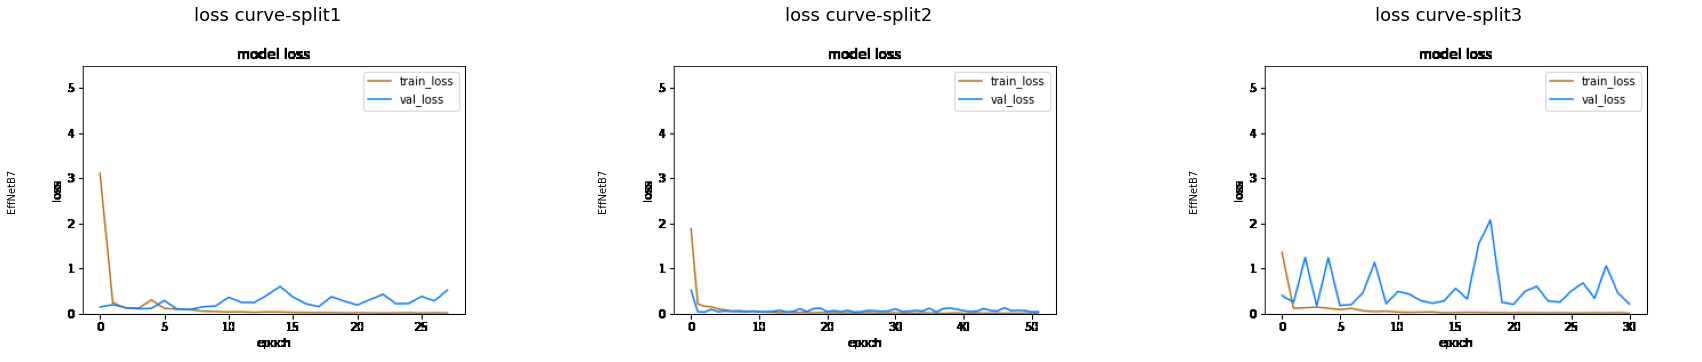

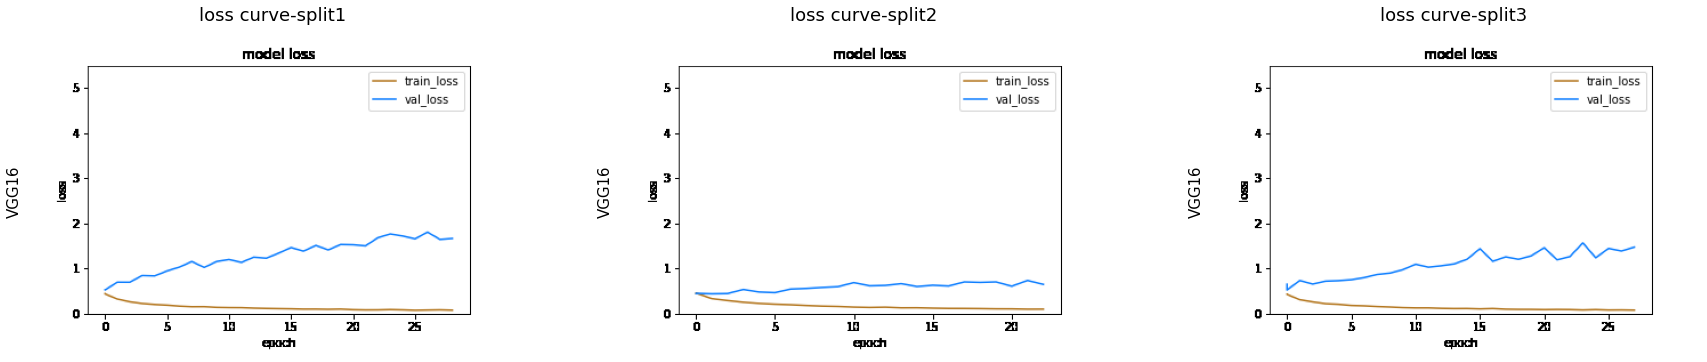

In [10]:
import glob
import cv2
loss_split1 = sorted(glob.glob('/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Notebooks_Master/trainings/loss_curves/loss_split1/*'))
loss_split2 = sorted(glob.glob('/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Notebooks_Master/trainings/loss_curves/loss_split2/*'))
loss_split3 = sorted(glob.glob('/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Notebooks_Master/trainings/loss_curves/loss_split3/*'))

for im1,im2,im3 in zip(loss_split1,loss_split2,loss_split3):
    train1 = im1.split('/')[10].replace('.png','')
    train2 = im2.split('/')[10].replace('.png','')
    train3 = im3.split('/')[10].replace('.png','')
    im_1 = cv2.imread(im1)
    im_1 = np.array(im_1)
    im_2 = cv2.imread(im2)
    im_2 = np.array(im_2)
    im_3 = cv2.imread(im3)
    im_3 = np.array(im_3)
    fig, ax = plt.subplots(1,3,figsize=(30,30))
    plt.rcParams.update({'font.size':15})
    ax[0].imshow(im_1)
    ax[1].imshow(im_2)
    ax[2].imshow(im_3)
    ax[0].set_title('loss curve-split1')
    ax[1].set_title('loss curve-split2')
    ax[2].set_title('loss curve-split3')
    ax[0].set_ylabel(train1)
    ax[1].set_ylabel(train2)
    ax[2].set_ylabel(train3)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['left'].set_visible(False)
    ax[2].spines['bottom'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    plt.savefig('losscurves_for_thesis.png')
    plt.show()


In [11]:
import pandas as pd

data = {'Accuracy':  ['33.333','72.358','30.081','94.309','95.935','94.309'],
        'Precision': ['23.000','42.500','24.561','88.889','100.000','95.652'], 
        'Recall':['82.143','60.714','100.000','85.714','82.143','78.571'], 
        'f1':['35.938','50.000','39.437','87.273','90.196','86.275']
         }
df = pd.DataFrame (data, columns = ['Accuracy','Precision','Recall','f1'], 
                   index = ['Test_vgg16_split1','Test_vgg16_split2','Test_vgg16_split3',
                            'Test_effnetb7_split1','Test_effnetb7_split2','Test_effnetb7_split3'])
df

#Find the test average scores of each fold
acc = pd.Series(data['Accuracy'], dtype = float)
acc = round(acc.groupby(acc.index//3).mean(),3).tolist()
prec = pd.Series(data['Precision'], dtype = float)
prec = round(prec.groupby(prec.index//3).mean(),3).tolist()
rec = pd.Series(data['Recall'], dtype = float)
rec = round(rec.groupby(rec.index//3).mean(),3).tolist()
f1 = pd.Series(data['f1'], dtype = float)
f1 = round(f1.groupby(f1.index//3).mean(),3).tolist()

data_average = {'Accuracy': acc, 'Precision': prec, 'Recall':rec,'f1':f1}
df_average = pd.DataFrame (data_average, columns = ['Accuracy','Precision','Recall','f1'], 
                   index = ['Test_vgg16_average','Test_effnetB7_average'])

df_average


,Accuracy,Precision,Recall,f1
Test_vgg16_average,45.257,30.020,80.952,41.792
Test_effnetB7_average,94.851,94.847,82.143,87.915


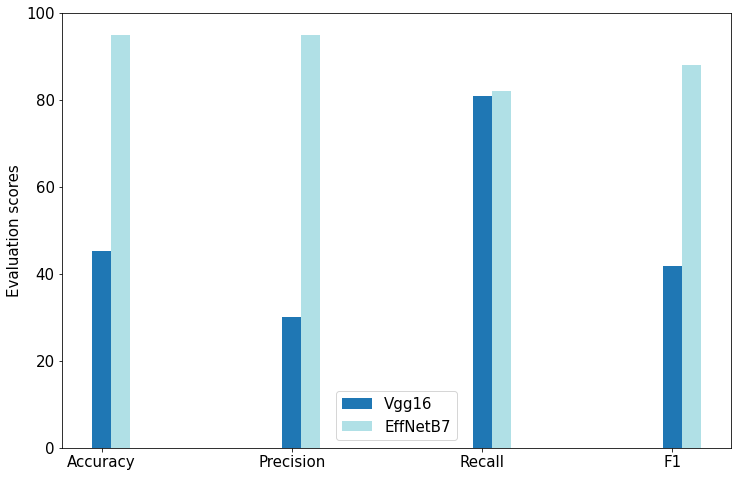

In [12]:
#test data


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

metrics = ['Accuracy','Precision','Recall','F1']

#add average accuracy,precision,recall, f1 scores
vgg16 = [45.257,30.020,80.952, 41.792]
effnetB7 = [94.851,94.847,82.143,87.915]

r = [0,1,2,3] 
width = 0.1

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
first_plot = ax.bar(np.arange(len(vgg16)), vgg16, width, color='#1f77b4', label = 'Vgg16') 
second_plot = ax.bar(np.arange(len(effnetB7))+width, effnetB7, width, color='powderblue', label = 'EffNetB7')


plt.xticks(r, metrics, rotation = 0)
plt.legend(loc='best')
plt.ylabel('Evaluation scores')
plt.ylim(0,100)
plt.rcParams.update({'font.size': 12})
plt.savefig('evaluate_test_2models.png');

plt.show();